In [1]:
#Importing Libraries
from deepface import DeepFace
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import os
import pandas as pd
import shutil
import cv2
from psd_tools import PSDImage
from psd_tools import compose

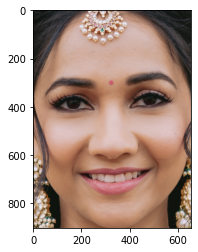

In [2]:
#Reading Input Query
img_path= r'query\Object_2.JPG'
faces = RetinaFace.extract_faces(img_path=img_path, align=False)
person = faces[0]
plt.imshow(person)

In [3]:
data=[]

In [4]:
def func1(img_path,name):
    img = cv2.imread(img_path)
    l = img.shape[1]//3
    faces = RetinaFace.detect_faces(img) 
    x,y,w,h = faces['face_1']['facial_area']
    mid = (x+w)//2
    pos = ""
    if mid <= l:
        pos += 'l'
    elif mid>l and mid<=2*l:
        pos+='c'
    elif mid>2*l:
        pos+='r'
    print('yes')
    ty = ""
    if img.shape[0] > img.shape[1]:
        ty +="v"
    elif img.shape[0] <= img.shape[1]:
        ty+='h'
    data.append([name,pos,y,ty])
    return

In [5]:
#Reading Input 
dire = 'data'
i=0
for images in os.listdir(dire):
    img_path = dire + '\\{}'.format(images)
    faces = RetinaFace.extract_faces(img_path=img_path, align=True) #Extracting Faces from the image
        #print(len(faces))
    if len(faces)>1:
        continue
    face = faces[0]
    result = DeepFace.verify(person,face,detector_backend='opencv',enforce_detection= False, model_name='ArcFace', distance_metric='euclidean_l2')
    if result['verified'] == True:
        func1(img_path,images)
        src = img_path
        r_dir = "{}".format('Object2')
        dest = r_dir + "\\{}".format(images)
        if not os.path.isdir(r_dir):
            os.mkdir("{}".format(r_dir))
        shutil.copyfile(src,dest)

1/1 [==============================] - 0s 91ms/step
yes
1/1 [==============================] - 0s 87ms/step
yes
1/1 [==============================] - 0s 87ms/step
yes
1/1 [==============================] - 0s 86ms/step
yes
1/1 [==============================] - 0s 81ms/step
yes
1/1 [==============================] - 0s 82ms/step
yes
1/1 [==============================] - 0s 102ms/step
yes


In [19]:
#Reading psd
psd = PSDImage.open(r'psd\2.psd')
psd

PSDImage(mode=ColorMode.RGB size=10800x3600 depth=8 channels=3)
  [0] PixelLayer('Background' size=10800x3600)
  [1] PixelLayer('Sheet1_Object2_1_bg_c_h' size=5322x3549)
  [2] PixelLayer('Sheet1_Object2_2_bg_r_h' size=7585x5058)
  [3] PixelLayer('Sheet1_Object2_3_v' size=2077x3114 effects)
  [4] PixelLayer('Sheet1_Object2_4_v' size=1967x2950 effects)
  [5] PixelLayer('Sheet1_Object2_5_h' size=2026x1351 effects)

In [15]:
df = pd.DataFrame(data,columns=["Name","PositionOfFace","HeadRoom","Type"])
df

,Name,PositionOfFace,HeadRoom,Type
0,DE_00456.JPG,c,1323,v
1,DE_02250.JPG,c,1281,v
2,DE_02513.JPG,c,829,v
3,DE_02576.JPG,c,1814,v
4,DE_02818.jpg,c,367,v
5,DE_02866.JPG,c,763,v
6,object_2.JPG,c,1012,v


In [17]:
df.loc[7] = ['DE_00394', 'c', 500, 'h']
df

,Name,PositionOfFace,HeadRoom,Type
0,DE_00456.JPG,c,1323,v
1,DE_02250.JPG,c,1281,v
2,DE_02513.JPG,c,829,v
3,DE_02576.JPG,c,1814,v
4,DE_02818.jpg,c,367,v
5,DE_02866.JPG,c,763,v
6,object_2.JPG,c,1012,v
7,DE_00394,c,500,h


In [8]:
# x = df[df['PositionOfFace']=='c']
# x = x[x["HeadRoom"]>1500]
# if len(x)!=0:
#     x.iloc[0].name
#     df.drop(x.iloc[0].name,axis=0,inplace=True)
# df

,Name,PositionOfFace,HeadRoom,Type
0,DE_00456.JPG,c,1323,v
1,DE_02250.JPG,c,1281,v
2,DE_02513.JPG,c,829,v
4,DE_02818.jpg,c,367,v
5,DE_02866.JPG,c,763,v
6,object_2.JPG,c,1012,v


In [24]:
def rep_name():
    return

In [25]:
#Layers information
folder = 'Object2'
result = 'results'
images=os.listdir(folder)
layers = psd._layers
# for i in range(1,len(layers)):
#     name  = layers[i].name + '.JPG'#+ '_{}'.format(images[i-1])
#     nname = 'new_'+name
#     image = cv2.imread(folder+"\\{}".format(images[i]))
#     new_image = cv2.resize(image, (layers[i].size[-2],layers[i].size[-1]))
#     src = folder+'\\'+images[i-1]
#     dest = result + "\\" + name
#     ndest = result + "\\" + nname
#     cv2.imwrite(dest,new_image)
#     #os.popen(f"copy {src} {dest}") 
#     print(new_image.shape)
for i in range(len(layers)):
    layer = layers[i]
    if layer.name == "Background":
        continue
    else:
        rep_name(layer.name)

TypeError: rep_name() takes 0 positional arguments but 1 was given

In [32]:
(layers[i].size[-1],layers[i].size[-2])


(1351, 2026)

In [7]:
folder+"\\{}".format(images[i])

'Object2\\DE_02866.JPG'

(5716, 3811, 3)


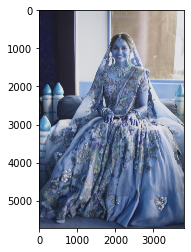

In [15]:
from numpy import size


image = cv2.imread(folder+"\\{}".format(images[i]))
print(image.shape)
plt.imshow(image)

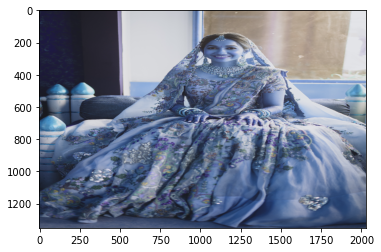

In [16]:
new_image= cv2.resize
plt.imshow(new_image)

In [24]:
cv2.imwrite('results\\Sheet1_Object2_.JPG',new_image)

True

In [20]:
# Import local modules
from photoshop import Session
import photoshop.api as ps


# style 1
app = ps.Application()
app.load(r"C:\Study\Editoo Intern\Task_1\mytest_data\psd\2 - Copy.psd")

# style 2
with Session(r"C:\Study\Editoo Intern\Task_1\mytest_data\psd\2 - Copy.psd", action="open") as ps:
    ps.echo(ps.active_document.name)
#app.doJavaScript(r"C:\Study\Editoo Intern\Task_1\mytest_data\psd\replacingimage.jsx",ExecutionMode='runfile')

2 - Copy.psd


In [21]:
jsx = r"""
var doc = app.activeDocument;
var curLayer
var thePath = doc.path
 //var layer  
 
//function goThroughLayers(parentLayer){
    //for(var i=0; i <parentLayer.layers.length;i++){
        //curLayer = parentLayer.layers[i];
       // doc.activeLayer = curLayer;

//createSmartObject();
 // PSDs Options; 
psdSaveOptions = new PhotoshopSaveOptions();
psdSaveOptions.annotations = true;
psdSaveOptions.layers = true;  
psdSaveOptions.embedColorProfile = true;  
psdSaveOptions.spotColors = true;  
psdSaveOptions.alphaChannels = true;
	       
      //  }//end loop
    //}//end function
//var layerName = app.activeDocument.activeLayer.name
gothroughfolder ();  
//doc.saveAs( new File ( "F:\image_processing_python\output_sheet1.psd"))
function gothroughfolder(){
    var theFolder = Folder.selectDialog("select folder");
        if (theFolder) {
            var theFiles = theFolder.getFiles(/\.(jpg|JPG|tif|eps|psd)$/i);
             for (var m = 0; m < theFiles.length; m++){
                //alert(theFiles[m].name.split(/(\\|\/)/g).pop());
           
                for (var i = 0; i < doc.layers.length; i++){
                    //alert(doc.layers[i].name.split(/(\\|\/)/g).pop())
                   // //alert(doc.layers[i].name)
                    //alert(theFiles[m].name.split(/(\\|\/)/g).pop())
                    if (doc.layers[i].name == theFiles[m].name.split(/(\\|\/)/g).pop().replace('.JPG','')){
                        // alert( 'IF LOOP')
                         curLayer = doc.layers[i];
                         doc.activeLayer = curLayer;
                         createSmartObject ();
                         replaceContents (theFiles[m], curLayer)
						 resizeSmartObject();
                         }
                }
            }
           
        }
    doc.saveAs(new File(thePath + "/" + "output" + "_" + theFolder.name.split(/(\\|\/)/g).pop() + ".psd"), psdSaveOptions, true,Extension.LOWERCASE);
    
    }




function createSmartObject() {
    var idnewPlacedLayer = stringIDToTypeID( 'newPlacedLayer' );
    executeAction(idnewPlacedLayer, undefined , DialogModes.NO);
}
 
 
 
// Replace SmartObject Contents


function replaceContents(newFile, theSO) {
    //app.activeDocument.activeLayer = theSO;
    // =======================================================
    var idplacedLayerReplaceContents = stringIDToTypeID("placedLayerReplaceContents");
    var desc3 = new ActionDescriptor();
    var idnull = charIDToTypeID("null");
    desc3.putPath(idnull, new File(newFile));
    var idPgNm = charIDToTypeID("PgNm");
    desc3.putInteger(idPgNm, 1);
    executeAction(idplacedLayerReplaceContents, desc3, DialogModes.NO);
    return app.activeDocument.activeLayer
};


function resizeSmartObject() {

//target current active layer

var ref = new ActionReference(); 

ref.putEnumerated( charIDToTypeID( "Lyr " ), charIDToTypeID( "Ordn" ), charIDToTypeID( "Trgt" ) );    

//check the type of layer

//1 = ArtLayer

//2 = Adjustment

//3 = Text

//4 = Shape

//5 = Smart Object

// ...

//9 = Gradient Fil

//10 = Pattern Fill

//11 = Solid Fill

var layerType = executeActionGet(ref).getInteger(stringIDToTypeID("layerKind"));

//if layer is a smart object, get diminensions of source

if (layerType == "5") {

    var obj = executeActionGet(ref).getObjectValue(stringIDToTypeID("smartObjectMore"));    

    with (obj) {  

        var _tmp = getObjectValue(stringIDToTypeID("size"));  

        var size = new Object({  

            width:  _tmp.getDouble(stringIDToTypeID("width")),  

            height: _tmp.getDouble(stringIDToTypeID("height")),  

        });  

    }

    //divide the original/current

    var bounds = app.activeDocument.activeLayer.bounds;  

    var w_new = (size.width/(bounds[2].value - bounds[0].value))*100;

    var h_new = (size.height/(bounds[3].value - bounds[1].value))*100;

    app.activeDocument.activeLayer.resize(w_new, h_new);

    return;

} else { return; }

}


"""
app.doJavaScript(jsx)


# Print name of current active document.
print(app.doJavaScript("app.activeDocument.name"))

2 - Copy.psd
